In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import pandas as pd

X = []
y = []

for i in range(1, 58):
    # Read CSV, skipping the first row as header and the first column as index
    df = pd.read_csv(f'cov-matrix/{i:02d}-cov.csv', header=0, index_col=0)
    df_np = df.to_numpy()
    if df_np.size == 400:  # Adjust this number based on your data
        df_reshape = df_np.reshape((1, 400))
        print("Reshaped array:", df_reshape)
        X.append(df_reshape)
    else:
        print(f"Unexpected size: {df_np.size}. Cannot reshape to (1, 400).")

X = np.array(X)
X = X.squeeze(axis=1)
print(X.shape)

Reshaped array: [[ 6.47434331e+03  1.20570165e+03 -1.28106365e+03  9.60988336e+01
  -3.28705214e+02  3.11140223e+02 -4.76387185e+02  2.20146999e+02
  -2.97382326e+02  5.22769482e+01 -1.77253454e+02  2.75873553e+02
  -3.40295213e+01  4.75363546e+01 -7.50455926e+01  4.97335958e+00
   5.19183355e+01 -1.69722970e+02 -6.97818226e+01  6.56086566e+01
   1.20570165e+03  1.06800859e+03 -2.36249850e+02 -6.92267034e+01
   4.80621376e+01 -9.13339585e+01  6.27090338e+01 -1.53283592e+01
   4.93399263e+01 -6.84769029e+01  7.48286743e+01  3.33120756e+01
   5.36597315e+01 -2.75068885e+01 -2.98686552e+01 -5.55084273e+00
   8.05099333e+00 -5.68061085e+01 -3.72948406e+01  1.15680674e+01
  -1.28106365e+03 -2.36249850e+02  5.45728985e+02  2.53026162e+01
   6.43176099e+01  1.29647296e+01  7.80176277e+01  4.92207917e+00
   4.50705624e+01  3.07314309e+01  2.16321814e+01 -3.52096328e+01
  -2.02520990e+01  1.57869074e+01  1.49383608e+01 -1.26869783e+01
  -2.61019010e+01  2.28693029e+01  2.86847753e+01 -3.1922645

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
print(kmeans.labels_)
# plt.scatter(X[:, 0], X[:, 100], c=kmeans.labels_, s=50, cmap='viridis')

[2 5 1 5 0 2 2 5 0 0 2 5 2 2 2 4 1 2 2 5 2 2 0 5 2 0 2 0 0 2 1 5 2 3 2 2 2
 0 2 2 2 2 2 1 3 2 2 2 2 0 0 2 2 2 2 2 2]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=3)
# reduced_data = pca.fit_transform(X)
# print(reduced_data)


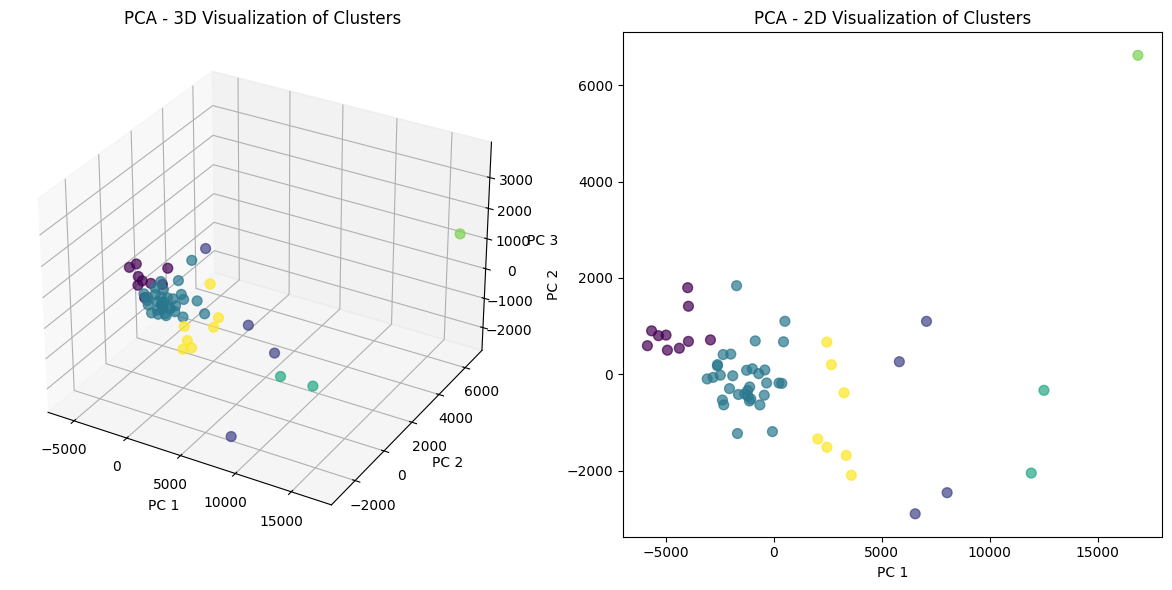

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming you have your data in X and kmeans.labels_
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# Create a figure with two subplots
fig = plt.figure(figsize=(12, 6))

# 3D Scatter Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], 
            alpha=0.7, c=kmeans.labels_, s=50, cmap='viridis')
ax1.set_title('PCA - 3D Visualization of Clusters')
ax1.set_xlabel('PC 1')
ax1.set_ylabel('PC 2')
ax1.set_zlabel('PC 3')

# 2D Scatter Plot
ax2 = fig.add_subplot(122)
ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], 
            alpha=0.7, c=kmeans.labels_, s=50, cmap='viridis')
ax2.set_title('PCA - 2D Visualization of Clusters')
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')

# Show the plot
plt.tight_layout()
plt.show()
